In [66]:
import os

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

% matplotlib inline
sns.set()
sns.set_color_codes()

## Comparing GDP

### A. Total GDP (constant, mkt) data 

#### DONE
* Compare constat market data from IMF (IFS vs WEO) - choose one **<span style="color:lime; background:green;">In Progress</span>** for select countries
    * For WEO **<span style="color:white; background:limegreen;">DONE</span>**
    * For IFS - construct real gdp series in reference to same base year

* Construct xarray with other sources (PWT, UN, WB) 
    * For market based GDP index **<span style="color:white; background:limegreen;">DONE</span>**
    * For PPP not done yet
    
If there is discrepancy, trace the source:

* Compare country-by-country **<span style="color:white; background:maroon;">STARTED</span>**
 
* Compare aggregates (top 10 countries/mortality countries)

* Compare total

### Next Steps

* Compare PWT values (rgpdna, rgpde, rgpdo)

Status:
**<span style="color:white; background:maroon;">STARTED</span>**

---
Tips
* Compare/plot major countries 
    * mortality countries
        
    Brazil  1997-2009
    Chile 1997-2012
    EU (different spatial scale than others - NUTS2)
    France 1998-2012
    India 1957-2001
    Japan 1975-2012
    Mexico 1990-2012
    USA 1968-2013

    * Question - is discrepancy from the top 10 or others? (get a factor of gdp_top_10/gdp_total

In [67]:
### assign all file locations

In [68]:
dir_path = os.environ['ZERG']

pwt = dir_path + 'data/pwt/pwt90.xlsx'
wb = dir_path + 'data/wb/gdp/gdp_constant/API_NY.GDP.MKTP.KD_DS2_en_csv_v2.csv'
imf = dir_path + 'data/imf/WEOOct2017all.xls'

# meta data
rhg_regions = dir_path + 'data/meta_data/iso_map_based_on_rhg_regions.xls'

### Z. Convenience functions (ISO)

In [69]:
# open ISO map

In [70]:
iso = pd.read_excel(rhg_regions, sheetname='mapper_iso_to_country_name')

# rhg_regions file updated to include Syria and Kosovo
iso_map = iso[['countryName', 'iso']].set_index('countryName').to_dict()['iso']

In [71]:
iso_map_un_na = iso[['countryNameUNNA', 'iso']]
iso_map_un_na.columns.values[0] = 'countryName'
iso_map_un_na = iso_map_un_na.set_index('countryName').to_dict()['iso']

In [72]:
def add_iso_column(_df, _country_name_col, data_source='general'):
    # uses iso_map (global dict)
    if 'iso' in _df.columns:
        pass
    elif data_source is 'un':
        _df['iso'] =  _df[_country_name_col].apply(lambda name: iso_map_un_na[name] if iso_map_un_na.get(name) else name)
    else:
        _df['iso'] = _df[_country_name_col].apply(lambda name: iso_map[name] if iso_map.get(name) else name)
    return _df

In [73]:
# retrieving from ataframe

In [74]:
# country specific
def get_row_by_country_name(_df, country_name, col_name='country_name'):
    # Get country by name
    if col_name not in _df.columns:
        raise Exception('Column name {} does not exist!'.format(col_name))
    return _df[_df[col_name] == country_name]

In [75]:
# munging dataframe: dropping certain columns, setting index, etc.

In [76]:
def drop_non_years(_df):
    def _is_year(_y):
        try:
            float(_y)
            return True
        except ValueError:
            return False
    return _df[[x for x in _df.columns if _is_year(x)]] 


def drop_years_not_in_1950_2016(_df):
    _cols = [y for y in range(1950, 2017)]
    return df[_cols]

def set_col_as_index(_df, _col_name):
    return _df.set_index(_col_name)

# set year as columns name
def set_col_idx_name(_df, col_idx_name='year'):
    _df.columns.name = col_idx_name
    return _df

In [77]:
# plotting

In [78]:
# lets simplify
def label_axes(_ax, _x_label, _y_label, _title):
    _ax.set_xlabel(_x_label, fontsize=14)
    _ax.set_ylabel(_y_label, fontsize=14)
    _ax.set_title(_title, fontsize=14)

### Y. Download data (PWT, IMF, WB) - real market

### A. Total GDP, real mkt

### Data prepping:

In [79]:
# 1.WEO data (4 countries only for comparison with IFS)

In [80]:
imf_sub = dir_path + 'data/imf/weo_oct_2017_sub.xls'

In [81]:
df_imf_sub = pd.read_excel(imf_sub)
df_imf_real_mkt = df_imf_sub[df_imf_sub['Type']=='gdp_real_mkt']

In [82]:
df_imf_mod = drop_non_years(set_col_as_index(df_imf_real_mkt, 'ISO'))
df_imf_mod.columns = df_imf_mod.columns.to_series().apply(lambda x: int(x))

In [83]:
historical_years = [x for x in range(1980,2017)] # not forecasts
df_imf_hist = df_imf_mod[historical_years]

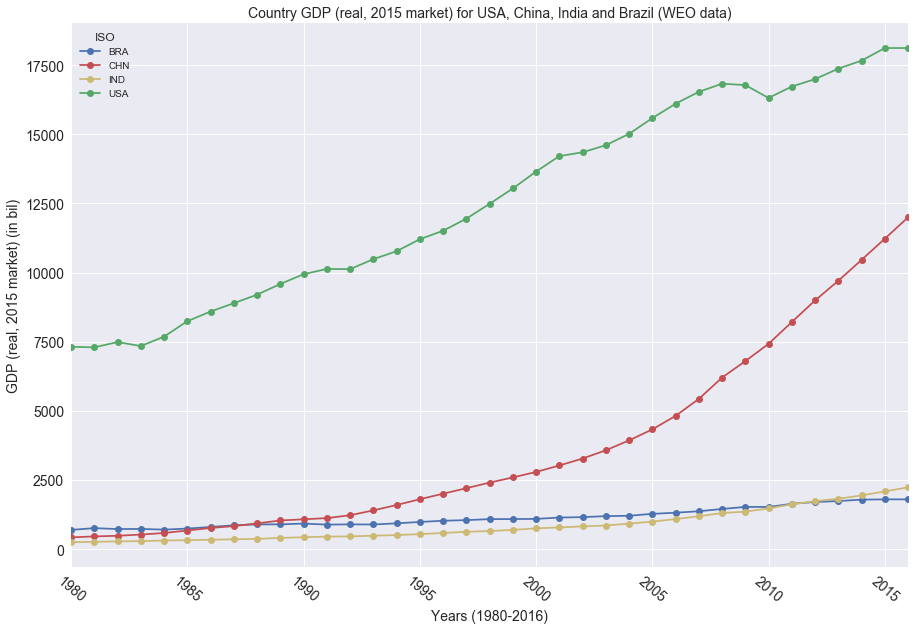

In [84]:
a = df_imf_hist.T.plot(style=['bo-','ro-', 'yo-', 'go-'], figsize=(15,10), fontsize=14, grid=True, rot=320, colormap='tab10')

label_axes(a, 
           'Years (1980-2016)', 
           'GDP (real, 2015 market) (in bil)', 
           'Country GDP (real, 2015 market) for USA, China, India and Brazil (WEO data)')

In [85]:
# Country GDP using IMF IFS
# waiting on IFS data subset
# this is painful - IFS has lot of issues
dir_path
'/Users/mlimb/Downloads/IFS_12-29-2017 19-25-04-10_timeSeries/ifs_test_file2.csv'


'/Users/mlimb/Downloads/IFS_12-29-2017 19-25-04-10_timeSeries/ifs_test_file2.csv'

In [86]:
filepath_ifs_real_gdp = '/Users/mlimb/Dropbox/covariate_project/zerg/data/imf/ifs/ifs_real_gdp_sub.xls'
filepath_ifs_ex_rate = '/Users/mlimb/Dropbox/covariate_project/zerg/data/imf/ifs/ifs_exchange_rate_sub.xls'

In [87]:
# real gdp: sheetname: gdp_real_spliced_historical_dcu
# dcu is for domestic currency unit

In [88]:
df_real_gdp = pd.read_excel(filepath_ifs_real_gdp, sheetname='gdp_real_spliced_historical_dcu')

In [89]:
df_ex_rate = pd.read_excel(filepath_ifs_ex_rate, sheetname='exchange_rate_avg')

In [90]:
df_real_gdp_iso = set_col_as_index(df_real_gdp, 'iso')
df_ex_rate_iso = set_col_as_index(df_ex_rate, 'iso')

In [91]:
#plot GDP in DCU first

In [92]:
df_real_gdp_years = drop_non_years(df_real_gdp_iso)
df_real_gdp_final = df_real_gdp_years.astype(float)

In [93]:
# exchange rate: avg is for period average exchange rate vs end of period (eop?)
# this is kinda slow

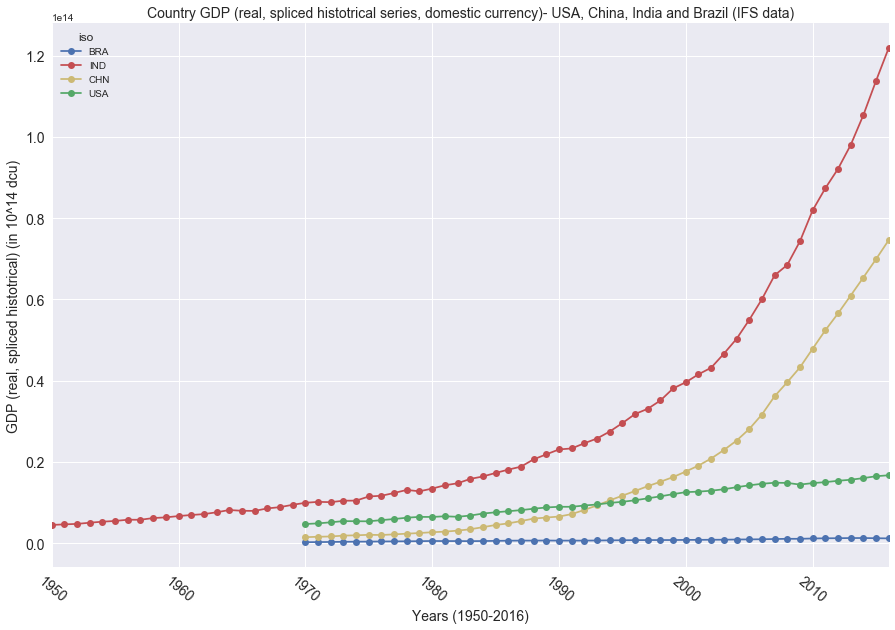

In [94]:
a = df_real_gdp_final.T.plot(style=['bo-','ro-', 'yo-', 'go-'], 
                       figsize=(15,10), fontsize=14, grid=True, rot=320, colormap='tab10')

#Gross Domestic Product, Real, Spliced Historical Series, Domestic Currency
# DCU for domestic currency unit
label_axes(a, 
           'Years (1950-2016)', 
           'GDP (real, spliced histotrical) (in 10^14 dcu)', 
           'Country GDP (real, spliced histotrical series, domestic currency)' +
           '- USA, China, India and Brazil (IFS data)')

In [95]:
# Take dot product of exchange rate and DCU gdp series to get GDP series in dollars!

In [96]:
df_ex_rate_final = drop_non_years(df_ex_rate_iso)

In [97]:
df_dotted = df_real_gdp_final.multiply(df_ex_rate_final, fill_value=np.nan)

In [98]:
df_real_gdp_in_bil = df_dotted.divide(10**9)
df_real_gdp_in_bil.loc['BRA']
df_real_gdp_no_brazil = df_real_gdp_in_bil.drop(['BRA'])

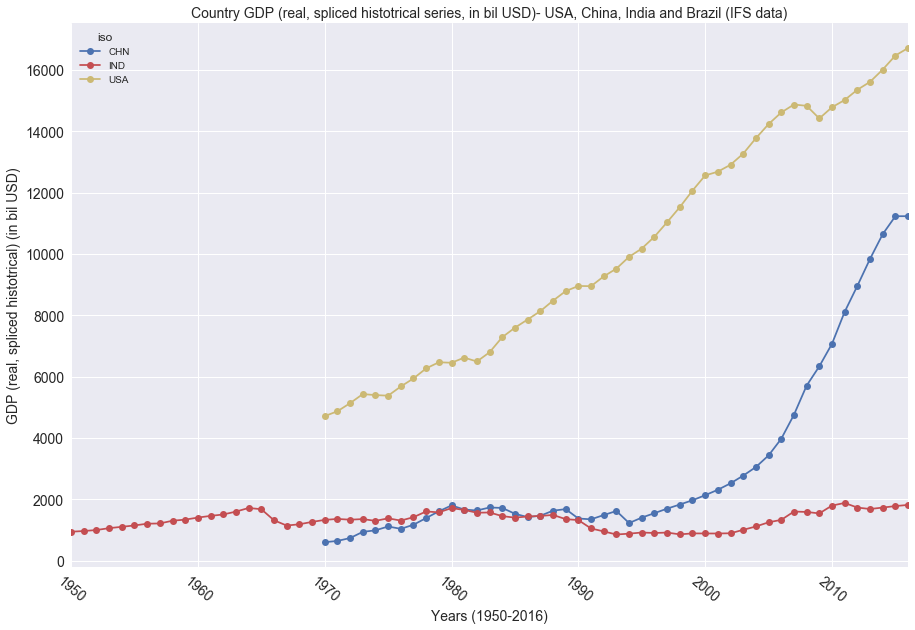

In [99]:
a2 = df_real_gdp_no_brazil.T.plot(style=['bo-','ro-', 'yo-', 'go-'], 
                       figsize=(15,10), fontsize=14, grid=True, rot=320, colormap='tab10')

#Gross Domestic Product, Real, Spliced Historical Series, Domestic Currency
# DCU for domestic currency unit
label_axes(a2, 
           'Years (1950-2016)', 
           'GDP (real, spliced histotrical) (in bil USD)', 
           'Country GDP (real, spliced histotrical series, in bil USD)' +
           '- USA, China, India and Brazil (IFS data)')

### To compare IFS data, construct real GDP series with same reference year

Given:  
        real gdp series in LCU (local currency unit)
        
        nominal gdp series in LCU (calculated using gdp deflator)
        
       $$gdp_{ri2} = \frac{gdp_{ri1}}{gdp_{rb1}} * gdp_{ni}$$

        
        exchange rate (USD/LCU)
     
        $$gdp_{ni} = \frac{gdp_{ri}}{100} * gdp_deflator$$
        
    where r = real
          n = nomina
          i = integer year
          b = old base year
          1 = with reference to old base year
          2 = with reference to new base year
          all units are in LCU.

       
       

### Download other data

In [100]:
# Open other data

In [101]:
os.listdir(dir_path + 'data/un/national_accounts')

['.DS_Store',
 'Download-GDPconstant-NCU-countries.xls',
 'Download-GDPconstant-USD-all.xls',
 'Download-GDPconstant-USD-countries.xls',
 'Download-GDPgrowth-USD-countries.xls',
 'Download-GDPPCconstant-USD-countries.xls']

In [102]:
wb = dir_path + 'data/combined_data/wb_gdp_mkt_constant.xls' # constant, market
#un = dir_path + 'data/un/national_accounts/Download-GDPconstant-USD-countries.xls' # market, constant

In [103]:
un = dir_path+ 'data/un/munged/un_national_acct_real_gdp_2005.csv' # is this correct one?

In [104]:
# pwt has all data in one file

In [105]:
# do pwt later since it's all PPP based
pwt = dir_path + 'data/pwt/pwt90.xlsx'
df_pwt = pd.read_excel(pwt, sheetname='Data')

In [106]:
df_wb = pd.read_excel(wb)
df_wb.shape # countries only

(217, 59)

In [107]:
df_un = pd.read_csv(un) # indicator we are interested in is Gross Domestic Product (GDP)

In [108]:
del df_un['Unnamed: 0']

In [109]:
def get_un_na_gdp_only(_df_un):
    #get only GDP indicator
    return _df_un[_df_un['IndicatorName'].str.startswith('Gross Domestic Product')] 

df_un_gdp = get_un_na_gdp_only(df_un)

In [110]:
# df_un_gdp.to_csv(dir_path +'/data/un/munged/un_national_acct_real_gdp_2005.csv')
# df_un_gdp.to_csv(dir_path +'/data/un/munged/un_na_real_gdp_2005.csv')

In [111]:
get_row_by_country_name(df_wb, 'Kosovo', 'countryName')

,countryName,iso,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
212,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.319987e+09,5.460691e+09,5.643169e+09,5.829934e+09,6.099252e+09,6.270547e+09,6.486283e+09,6.565321e+09,6.832951e+09,7.065142e+09


Notes

##### WB
* df_wb is GDP constant 2010 USD (indicator is NY.GDP.MKTP.KD)

* years: 1960- 2017

##### UN NA Main Aggregates
* constant 2005 

* years: 1970 - 2015

## Create Multi-Index of 4 Data sets to convert to xarray

Restructure pd dataframe so these are indexes

    country_code
    year
    source

cols as variable names
index as dimensions

    0. Add/set iso as index [x]

    1. Each df drop everything that's not a year [x]
    
country_name is meta data to country_code -> let's drop country_name (easiet)

    2. Set the name of the columns to be quote 'year' [x]

`df.column.name = 'year'` set column index

    3. `df.stack('year')` -> will return series (with two indices iso and year) with single value for iso-year combo

    4. pd.concat(
        {
            'wb': serires,
            'pwt': ..,
        }, axis=0, names=['source'])

names -> name of resulting index

#join all series along 0 axis

### add iso column

In [112]:
df_wb_iso = set_col_as_index(add_iso_column(df_wb, 'countryName', data_source='wb'), 'iso')
df_un_iso = set_col_as_index(add_iso_column(df_un, 'CountryName', data_source='un'), 'iso')

In [113]:
iso_map.get('Afghanistan')

assert (iso_map_un_na.get('Republic of Korea') == 'KOR') 
assert (iso_map_un_na.get('Republica Moldava') == 'MDA')

### drop non years

In [114]:
df_wb_yr = drop_non_years(df_wb_iso)
df_un_yr = drop_non_years(df_un_iso)

### set column value types as int

In [115]:
df_wb_yr.columns = df_wb_yr.columns.astype(int)
df_un_yr.columns = df_un_yr.columns.astype(int)

In [116]:
all_df = [df_wb_yr, df_un_yr]

### set 'year' as a column index name

In [117]:
[wb_source, un_source] = [set_col_idx_name(_df) for _df in all_df]

In [118]:
### convert units
# not needed for GDP data it seems!

### convert gdp values to gdp index (optional)

$$GDPindex_{i_b} = \frac{gdp_{i_b}}{gdp_{i=b}}$$

where
    
    i = target year (any year in series)
    
    b = base year (2010 for WB, 2005 for UN_na, and 2015 for IMF weo)
    
    b (small one) = base year that the real gdp is calculated with respect to. ie. gdp values are in base year values.



In [119]:
# a = un_source.loc['KOR']
# a.get_value(1970)

# gdi=un_source.apply(lambda row: row/row.get_value(2005), axis=1)
# gdi.loc['KOR']

In [120]:
def calculate_real_gdp_index(_df, _source):
    """
        Converts real constant gdp series to real gdp index. 
        For each country (row), gdp time series is divided by the gdp value from the given base year,
        resulting in gdp index series. Pandas apply method with axis=columns is used.
        
        Parameters
        ----------
        _df : DataFrame
            dataframe containing real constant gdp values. Rows are countries and columns and years.
            two indices are year (df.column.name) and iso (for primary index)
        _source : str
            string acronym for given data source. one of ['un', 'wb', 'imf_weo']
        Keeps nan values for any missing value.
        
        Returns
        -------
        df_gdi: DataFrame
            contains real gdp series indices
    """
    # base year of a given data source
    # base year in this context means vaue that real GDP series is constant with respect to. 
    get_gdp_base_year = {
        'un': 2005, 
        'wb': 2010,
        'imf_weo': 2015
    }
    base_year = get_gdp_base_year[_source]
#    df_gdi = _df.apply(lambda row: row/row.get_value(base_year), axis=1)
#     import IPython.core.debugger
#     dbg = IPython.core.debugger.Pdb()
#     dbg.set_trace()
    df_gdi = _df.div(_df[base_year], axis=0)
    return df_gdi

In [121]:
# `_df.div(df[norm_year], axis=1)`

In [122]:
def normalize_real_gdi(list_of_df, norm_year=2015):
    '''
        Normalizes real gdp index series from different data sources, so gdp index is
        1 relative to same year, and thus, comparable.
        
        Parameters
        ----------
        list_of_df: list
            list containing dataframes of real GDP index series
        norm_year: int, defaults to 2015 
            year to which gdp index series should be normalized (i.e. GDP index should
            be 1 for that year, and other values adjusted accordingly)
            
            Notes:
            
            Calling this parameter norm_year (normalization year) to distinguish 
            from any random year, but this is not an official term.
    '''
    def normalize_real_gdi_per_source(_df, norm_year):
        #return _df.apply(lambda row: row/row.get_value(norm_year), axis=1)
        return _df.div(_df[norm_year], axis=0)
    
    return [normalize_real_gdi_per_source(_df, norm_year) for _df in list_of_df]    

In [123]:
# %%debug

In [124]:
un_gdi = calculate_real_gdp_index(un_source, 'un')
wb_gdi = calculate_real_gdp_index(wb_source, 'wb')

In [125]:
[un_gdi_norm, wb_gdi_norm] = normalize_real_gdi([un_gdi, wb_gdi])

In [126]:
assert (1.0 in wb_gdi_norm[2015].unique() and 1.0 in un_gdi_norm[2015].unique())

### stack year

In [127]:
def stack_year(_df):
    return _df.stack('year')

#`df.stack('year')` -> will return series (with two indices iso and year) with single value for iso-year combo

In [128]:
### concat all munged multindex sources

In [129]:
# order is: 'wb', 'un'

combined = pd.concat({
#     'pwt': stack_year(pwt_source),
#     'imf': stack_year(imf_source),
    'wb': stack_year(wb_gdi_norm),
    'un': stack_year(un_gdi_norm)}, axis=0, names=['source'])

In [130]:
final = combined[combined.index.get_level_values('iso') != 'Total']
final = final[np.in1d(final.index.get_level_values('iso'), ['Total', 'World', np.nan, 'nan'], invert=True)]
final = final[~pd.isnull(final.index.get_level_values('iso'))]

In [131]:
#print(final.index.get_level_values('iso').unique().tolist())

# all values in each row of df

da = final.to_xarray()

In [132]:
da.isnull().any(dim='source')

<xarray.DataArray (iso: 237, year: 57)>
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False,  True],
       [ True,  True,  True, ..., False, False,  True],
       ..., 
       [ True,  True,  True, ..., False, False,  True],
       [ True,  True,  True, ..., False, False,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)
Coordinates:
  * iso      (iso) object 'ABW' 'AFG' 'AGO' 'AIA' 'ALB' 'AND' 'ARE' 'ARG' ...
  * year     (year) int64 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 ...

In [133]:
# 2010 data for countries with complete coverage across all datasets
complete_coverage_2010 = da.sel(iso=da.iso[~da.sel(year=2010).isnull().any(dim='source')], year=2010)
complete_coverage_2010

<xarray.DataArray (source: 2, iso: 164)>
array([[ 0.781421,  0.791209,  0.908156, ...,  0.899455,  0.774903,  0.736945],
       [ 0.788454,  0.79299 ,  0.910529, ...,  0.897129,  0.777706,  0.689593]])
Coordinates:
  * source   (source) object 'un' 'wb'
  * iso      (iso) object 'AFG' 'AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' ...
    year     int64 2010

In [134]:
complete_coverage_2010.var(dim='source').argmax(dim='iso') 

<xarray.DataArray ()>
array(146)
Coordinates:
    year     int64 2010

In [135]:
complete_coverage_2010.isel(
    iso=complete_coverage_2010.var(dim='source').argmax(dim='iso'))

<xarray.DataArray (source: 2)>
array([ 1.351019,  0.770122])
Coordinates:
  * source   (source) object 'un' 'wb'
    iso      <U3 'TLS'
    year     int64 2010

#### 1. Rename columns for name consistency across sources

In [136]:
# df_pwt_renamed = df_pwt_real_m.rename(index=str, columns={'countrycode': 'iso', 'country': 'country_name'})

In [137]:
da.year

<xarray.DataArray 'year' (year: 57)>
array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])
Coordinates:
  * year     (year) int64 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 ...

In [138]:
da.sel(year=2015, iso='CHN').min(dim='source')  / da.sel(year=2005, iso='CHN').max(dim='source')

<xarray.DataArray ()>
array(2.495798319327731)
Coordinates:
    iso      <U3 'CHN'

In [139]:
# sounds about right. value is about same compared to using actual gdp values
da.sel(year=2016, iso='CHN').min(dim='source')  / da.sel(year=1960, iso='CHN').max(dim='source')

<xarray.DataArray ()>
array(74.296875)
Coordinates:
    iso      <U3 'CHN'

In [140]:
# sounds about right (comparison with WB time series ratio of actual gdp values)
da.sel(year=2016, iso='USA').min(dim='source')  / da.sel(year=1960, iso='USA').max(dim='source')

<xarray.DataArray ()>
array(5.487012987012987)
Coordinates:
    iso      <U3 'USA'

### timeseries comparison of china for un vs wb

### boilerplate strings for labeling!@#!@#

In [141]:
# Annual Real GDP Index
xlab = 'Years ({0})'
ylab = 'Annual GDP Index (no unit)'
title = '{0} Annual Real GDP Index ({1}) with respect to {2} from different sources' 

# Total Real GDP Index
xlab = 'Years ({0})'
ylab = 'Annual GDP Index (no unit)'
title = '{0} Annual Real GDP Index ({1}) with respect to {2} from different sources' 

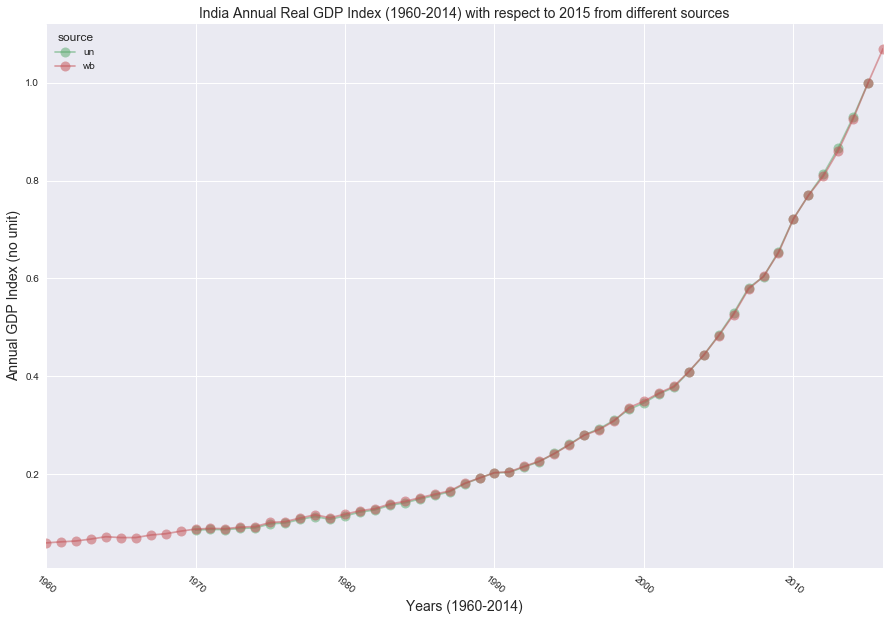

In [142]:
india = da.sel(iso='IND').to_series().unstack('source')
ind = india.plot(style=['go-','ro-'], figsize=(15,10), grid=True, rot=320, alpha=.5, ms=10)

label_axes(ind, xlab.format('1960-2014'),
                ylab, 
                title.format('India', '1960-2014', '2015'))

In [ ]:
top_10 = {
    'BRA': 'Brazil',
    'CHN': 'China',
    'USA': 'United States',
    'JPN': 'Japan'
}

def generate_country_series(_xr, list_of_countries):
    

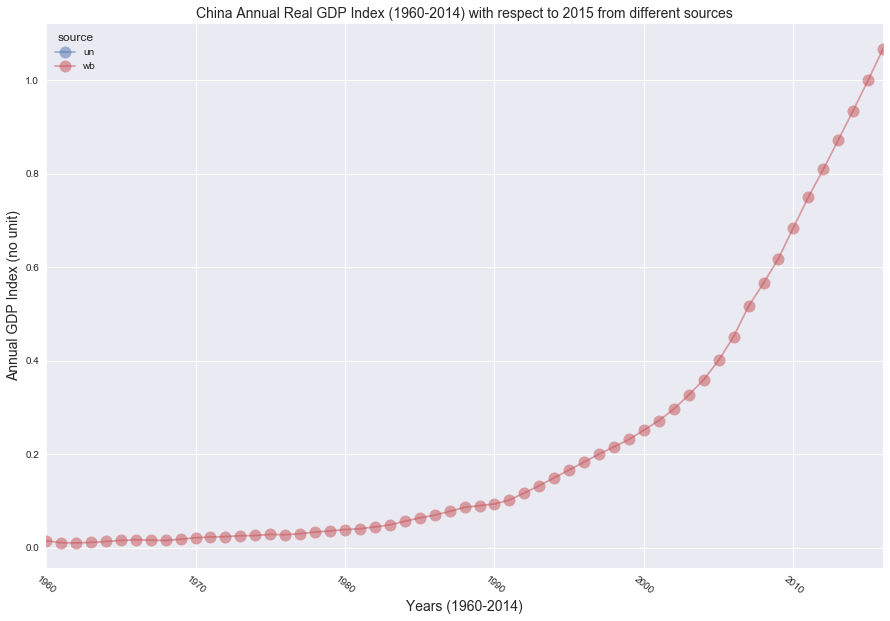

In [143]:
china = da.sel(iso='CHN').to_series().unstack('source')
chn = china.plot(style=['bo-','ro-'], figsize=(15,10), grid=True, rot=320, alpha=.5, ms=12)

label_axes(chn, xlab.format('1960-2014'),
                ylab, 
                title.format('China', '1960-2014', '2015'))

#### 2. Get a subset of PWT data (only columns related to gdp, plus iso and pop)

In [144]:
gdp_cols = ['countrycode', 'rgdpna', 'rgdpe', 'rgdpo']